# Why should you care about overfitting? 

#### Learning Objective: In this tutorial, we will learn what it means to overfit a model and how to avoid doing so.

#### Data: Imagine you own a website and you are able to track how many hits the website receives over time. Your server can only handle a certain amount of requests at a time. 

#### Prediction Question: When you will hit 100,000 hourly hits?

In [1]:
#load the libraries and data
import numpy as np
import scipy as sp
data = sp.genfromtxt("C:/Users/tehskhu/Documents/Personal/Analytics/Projects/Building Machine Learning Systems/Data/ch01/data/web_traffic.tsv", delimiter="\t")


Printing the first 10 rows of the data shows us two columns. 
1) the hour - this will be the x variable.
2) the number of website requests for that hour - this will be the y variable

In [2]:
#split the data into x, y 
x=data[:,0]
y=data[:,1]

#remove all NAs from both x,y
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

Let's plot the data to help us visualize what we are dealing with

<IPython.core.display.Javascript object>


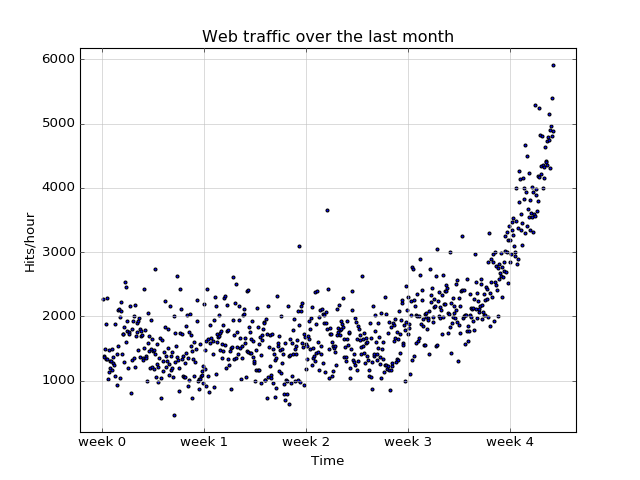

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(1)
# plot the (x,y) points with dots of size 7
plt.scatter(x,y,s=7)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)]) #xlabel to be week #
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75') #draw a slightly opaque, dashed grid
plt.show()

We will attempt to fit several polynomials to this set of data. But first let's define a way to measure error i.e. how off are we in our prediction with the polynomial vs. the actuals.
The error function below is just the sum of squared differences.

In [4]:
def error(f,x,y):
    return sp.sum((f(x)-y)**2)

## Let's fit a first order polynomial 

In [5]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x,y,1, full=True)
# The polyfit() function returns the parameters of the fitted model function, fp1

print("Model parameters: %s" % fp1)
print(residuals)

Model parameters: [   2.59619213  989.02487106]
[  3.17389767e+08]


We can see that we fit a polynomial of order 1 with the parameters 2.59 and 989.02. This is a straight line of the form y = 2.59x + 989.02

We can now form this line using generated x values and then plot it on the same graph to observe the fit in the scatter plot

317389767.34


<IPython.core.display.Javascript object>


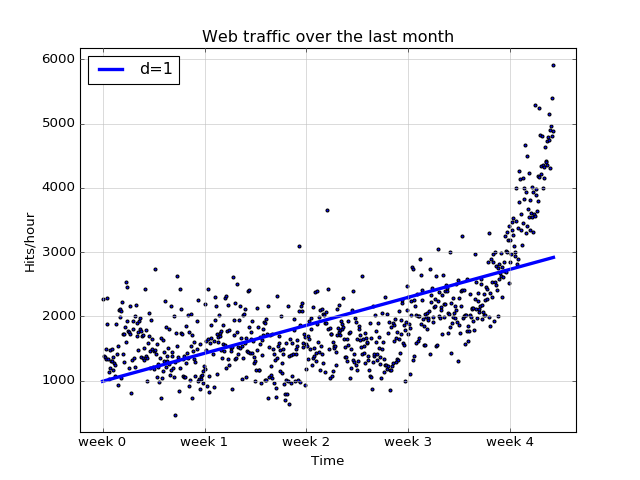

In [6]:
# use poly1d() to create a polynomial function from the model parameters. fp1 is an array of [2.5 989], then poly1d(fp1) is 2.5x + 989. If we had a larger array, it would be x^2 etc.
f1 = sp.poly1d(fp1)
print(error(f1,x,y))

#plotting the same graph as above
plt.figure(2)
# plot the (x,y) points with dots of size 7
plt.scatter(x,y,s=7)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)]) #xlabel to be week #
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75') #draw a slightly opaque, dashed grid

#adding a straight line into figure 2
fx = sp.linspace(0,x[-1],1000) #generate x-values for plotting
plt.plot(fx, f1(fx), linewidth=3)
plt.legend(["d=%i" % f1.order], loc="upper left")

We can see that the fit isn't the best...
## Let's try fitting a second order polynomial

In [7]:
f2p = sp.polyfit(x,y,2)
print(f2p)
f2 = sp.poly1d(f2p)
print(error(f2,x,y))

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
179983507.878


The quadratic that we fit is y = 1.05x^2 - 5.26x + 1.9*10^3, with an error of 179,983,507.
Plotting this on the graph results in the following.

<IPython.core.display.Javascript object>


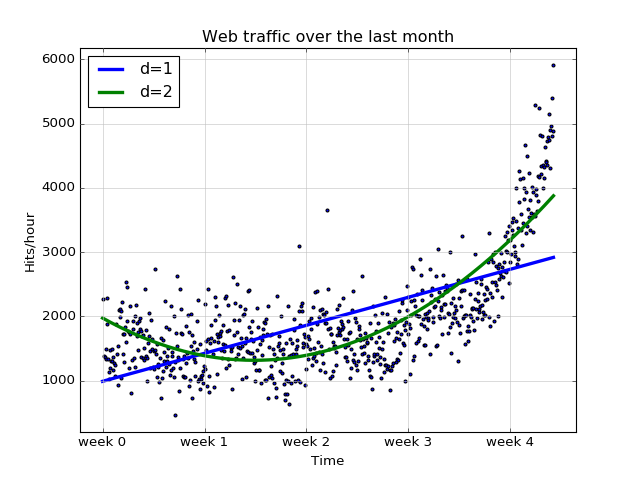

In [8]:
#plotting the initial scatter plot
plt.figure(3)
# plot the (x,y) points with dots of size 7
plt.scatter(x,y,s=7)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)]) #xlabel to be week #
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75') #draw a slightly opaque, dashed grid

#adding a straight line
fx = sp.linspace(0,x[-1],1000) #generate x-values for plotting
plt.plot(fx, f1(fx), linewidth=3)
plt.legend(["d=%i" % f1.order], loc="upper left")

#adding the second order polynomial
plt.plot(fx, f2(fx), linewidth=3)
plt.legend(["d=%i" % f1.order,"d=%i" % f2.order], loc="upper left")

We can see that the fit is getting better. 
## What if we were to try and fit polynomials of orders 3, 5 and 53?

<IPython.core.display.Javascript object>


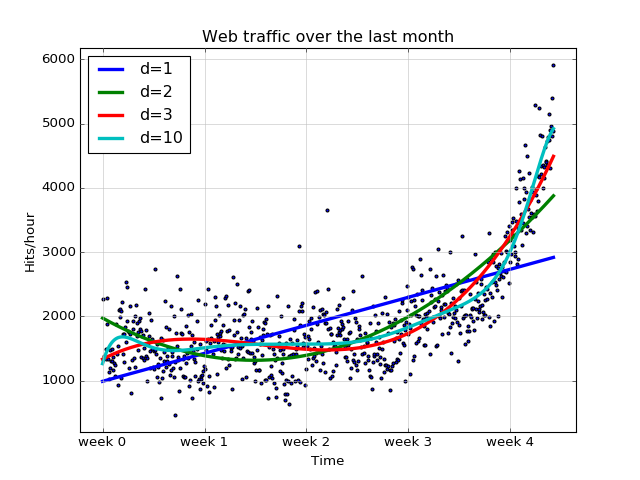

In [9]:
f3p = sp.polyfit(x,y,3)
f3 = sp.poly1d(f3p)

f10p = sp.polyfit(x,y,10)
f10 = sp.poly1d(f10p)

#plotting the initial scatter plot
plt.figure(4)

# plot the (x,y) points with dots of size 7
plt.scatter(x,y,s=7)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)]) #xlabel to be week #
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75') #draw a slightly opaque, dashed grid

#adding a straight line
fx = sp.linspace(0,x[-1],1000) #generate x-values for plotting
plt.plot(fx, f1(fx), linewidth=3)

#adding the polynomials of order 2, 3 and 10
plt.plot(fx, f2(fx), linewidth=3)
plt.plot(fx, f3(fx), linewidth=3)
plt.plot(fx, f10(fx), linewidth=3)
plt.legend(["d=%i" % f1.order,"d=%i" % f2.order,"d=%i" % f3.order,"d=%i" % f10.order], loc="upper left")




In [10]:
print("Error order 1: ", error(f1,x,y))
print("Error order 1: ",error(f2,x,y))
print("Error order 1: ",error(f3,x,y))
print("Error order 1: ",error(f10,x,y))


Error order 1:  317389767.34
Error order 1:  179983507.878
Error order 1:  139350144.032
Error order 1:  121942326.364


We can see that the fit is getting better visually and mathematically. The calculated errors are decreasing as well. This can only be a good thing right? What happens when we keep increasing our polynomial order. Let's go all the way up to order 99.

C:\Users\tehskhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\tehskhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


<IPython.core.display.Javascript object>


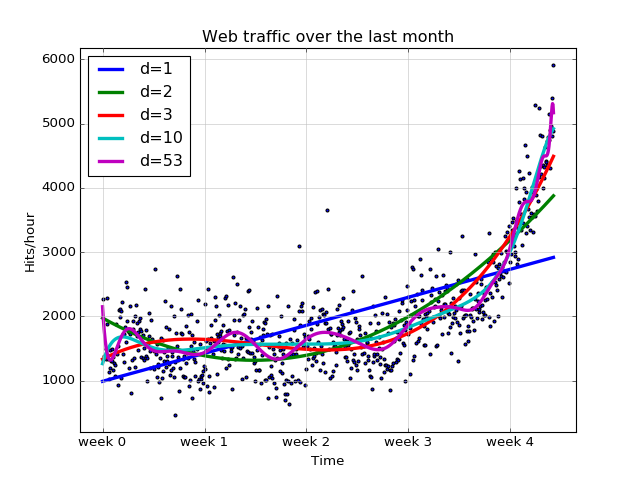

Error order 99:  109452405.392


In [11]:
f99p = sp.polyfit(x,y,99)
f99 = sp.poly1d(f99p)

#plotting the initial scatter plot
plt.figure(5)

# plot the (x,y) points with dots of size 7
plt.scatter(x,y,s=7)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)]) #xlabel to be week #
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75') #draw a slightly opaque, dashed grid

#adding a straight line
fx = sp.linspace(0,x[-1],1000) #generate x-values for plotting
plt.plot(fx, f1(fx), linewidth=3)

#adding the polynomials of order 2, 3 and 10
plt.plot(fx, f2(fx), linewidth=3)
plt.plot(fx, f3(fx), linewidth=3)
plt.plot(fx, f10(fx), linewidth=3)
plt.plot(fx, f99(fx), linewidth=3)
plt.legend(["d=%i" % f1.order,"d=%i" % f2.order,"d=%i" % f3.order,"d=%i" % f10.order,"d=%i" % f99.order], loc="upper left")
print("Error order 99: ",error(f99,x,y))


When we run this, we get a warning "polyfit may be poorly conditioned". Even though we had requested an order of 99 for this polynomial, the max that we got was 53. And even with order 53, can you see some problem with the fit. The error has decreased but does the way the line varies across the weeks, how likely is this pattern to continue in the future? Can we be absolutely certain that there are ups and downs within a week? 

We would need some knowledge about website traffic on our specific site to answer these types of questions. But without that, it is fair to see that the line is 'overfiting' the data and will not be predictive of another set of data points.

So what is the solution to this you ask? 

## We need to split our data into a training set and a testing set. 

The training set is what we used to fit the polynomial on and the testing set acts as a holdout sample that we will use to test our prediction on. 

Before we go on and splitting our dataset, let's make the problem a little more realistic. Let's assume the best fit for our data is actually a polynomial of order 1 for up to 3.5 weeks. After 3.5 weeks there is an inflection point, and we see traffic rise dramatically. So we will model this through two separate polynomials of order 1.

In [12]:
inflection = int(3.5*7*24) #calculate the inflection point in hours
xa = x[:inflection] #x before inflection
xb = x[inflection:] #x after inflection
ya = y[:inflection] #y before inflection
yb = y[inflection:] #y after inflection

fa = sp.poly1d(sp.polyfit(xa,ya,1))
fb = sp.poly1d(sp.polyfit(xb,yb,1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)

print("Error inflection=%f" % (fa_error + fb_error)) # the total error is the sum of the two polynomials of order 1 each

Error inflection=132950348.197616


<IPython.core.display.Javascript object>


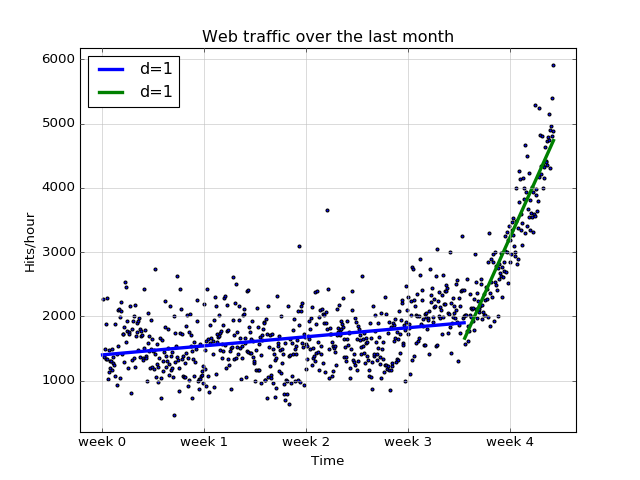

In [13]:
plt.figure(6)

plt.scatter(x,y,s=7)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(20)], ['week %i' % w for w in range(10)]) #xlabel to be week #
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75') #draw a slightly opaque, dashed grid

#Fits a simple polynomial line of order 1, split at 3.5 weeks
plt.plot(xa, fa(xa), linewidth=3)
plt.plot(xb, fb(xb), linewidth=3)
plt.legend(["d=%i" % fa.order,"d=%i" % fb.order], loc="upper left")
plt.show()

The fit for up to 3.5 weeks looks reasonable. For after 3.5 weeks, 
# let's split the data into a training and test set.

In [14]:
#For data after 3.5 weeks, we will split into 70% train, 30% test
frac = 0.7
split_index = int(frac*len(xb))
shuffled = sp.random.permutation(list(range(len(xb)))) #to shuffle the x points since they are currently in order
train = sorted(shuffled[split_index:])
test = sorted(shuffled[:split_index])

We will now do apply the same techniques as earlier. We will fit polynomials of the same degrees and let's see which one performs the best.

C:\Users\tehskhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\tehskhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\tehskhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


<IPython.core.display.Javascript object>


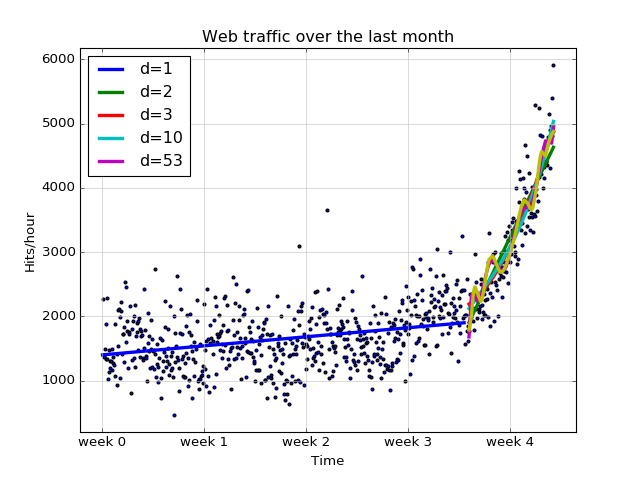

In [15]:
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

plt.figure(7)

plt.scatter(x,y,s=7)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)]) #xlabel to be week #
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75') #draw a slightly opaque, dashed grid

#Fits all the polynomial lines, split at 3.5 weeks
plt.plot(xa, fa(xa), linewidth=3)
plt.plot(xb[train], fbt1(xb[train]), linewidth=3)
plt.plot(xb[train], fbt2(xb[train]), linewidth=3)
plt.plot(xb[train], fbt3(xb[train]), linewidth=3)
plt.plot(xb[train], fbt10(xb[train]), linewidth=3)
plt.plot(xb[train], fbt100(xb[train]), linewidth=3)
plt.legend(["d=%i" % fbt1.order,"d=%i" % fbt2.order,"d=%i" % fbt3.order,"d=%i" % fbt10.order,"d=%i" % fbt100.order], loc="upper left")
plt.show()

It is hard to tell visually which fit is better. But this is precisely where the test set comes in. We will calculate the error on the test set. 

In [16]:
#see errors in test set for all 5 models, model with order 2 polynomial performs the best

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Test errors for only the time after inflection point
Error d=1: 17073141.552059
Error d=2: 16088000.531835
Error d=3: 16065334.623334
Error d=10: 97173310.359142
Error d=53: 299492825.049133


Error 2 is the lowest out of all five models. So that is the best model.

## Answering our prediction question... When will we hit 100,000 hourly hits?

In [17]:
sp.polyfit(xb[train], yb[train], 2)

array([  9.43449216e-02,  -1.07180806e+02,   3.25097430e+04])

The polynomial of order 2 that we selected has the following equation:
y = 6.98 * 10^-2 X^2 -74.85 X + 2.18 * 10^4

Setting y = 100,000 and solving for x will give us that we will hit 100,000 hits / hour at 9.6 weeks.